In [1]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
data = pd.read_csv("Loan Delinquent Dataset.csv")

In [3]:
data.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,36 months,Female,House,Mortgage,>25,300-500
1,2,No,0,36 months,Female,House,Rent,20-25,>500
2,3,Yes,1,36 months,Female,House,Rent,>25,300-500
3,4,Yes,1,36 months,Female,Car,Mortgage,>25,300-500
4,5,Yes,1,36 months,Female,House,Rent,>25,300-500


In [4]:
data.dtypes

ID                 int64
delinquent        object
Sdelinquent        int64
term              object
gender            object
purpose           object
home_ownership    object
age               object
FICO              object
dtype: object

In [5]:
data.term.value_counts()

term
36 months    10589
60 months      959
Name: count, dtype: int64

In [6]:
# Preprocessing
# Encode categorical variables
le = LabelEncoder()
categorical_columns = ['term', 'gender', 'purpose', 'home_ownership', 
                       'age', 'FICO']
for column in categorical_columns:
    data[column] = le.fit_transform(data[column])


In [7]:
data.head()

,ID,delinquent,Sdelinquent,term,gender,purpose,home_ownership,age,FICO
0,1,Yes,1,0,0,1,0,1,0
1,2,No,0,0,0,1,2,0,1
2,3,Yes,1,0,0,1,2,1,0
3,4,Yes,1,0,0,0,0,1,0
4,5,Yes,1,0,0,1,2,1,0


In [8]:
data.home_ownership.value_counts()

home_ownership
0    5461
2    5216
1     871
Name: count, dtype: int64

In [9]:
# Define features (X) and target (y)
X = data.drop(columns=['ID', 'delinquent', 'Sdelinquent'])  
# Drop non-predictive and redundant columns
y = data['Sdelinquent']


# Decision Tree Classifier:

In [10]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=42)


# Decision Tree Classifier ( CART):

In [11]:

# Build and train the decision tree classifier
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor, plot_tree
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)


,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [12]:
# Predict and evaluate the model on train data
y_pred_train= clf.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_train


# Predict and evaluate the model on test data
y_pred_test = clf.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_test


0.8496392496392496

In [13]:
from sklearn.metrics import confusion_matrix,classification_report
# Confusion Matrix - test
confusion_matrix_test = confusion_matrix(y_test, y_pred_test)
print(confusion_matrix_test)
# Classification report - test
report_test = classification_report(y_test, y_pred_test)
print(report_test)


[[ 836  285]
 [ 236 2108]]
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1121
           1       0.88      0.90      0.89      2344

    accuracy                           0.85      3465
   macro avg       0.83      0.82      0.83      3465
weighted avg       0.85      0.85      0.85      3465



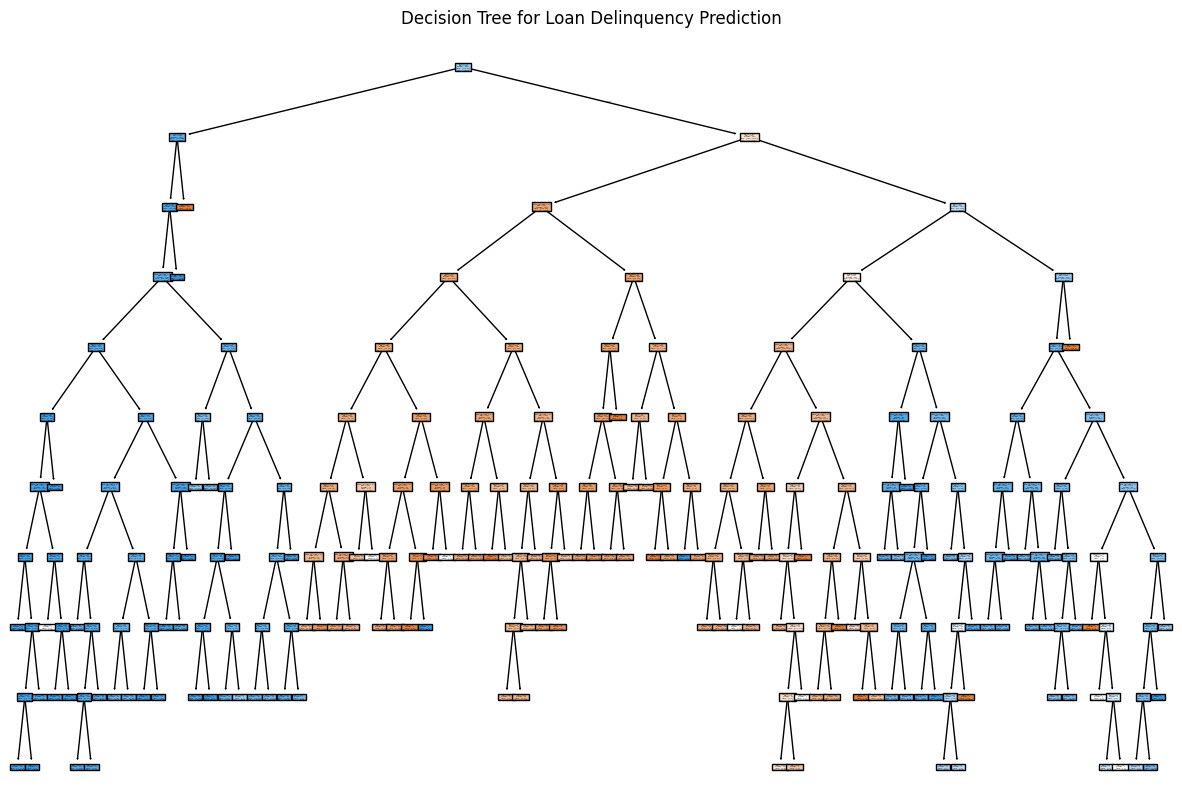

In [14]:
# Plot the decision tree (un pruned tree)
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=X.columns, 
          class_names=['Not Delinquent', 'Delinquent'], filled=True)
plt.title("Decision Tree for Loan Delinquency Prediction")
plt.show()



In [15]:
clf = DecisionTreeClassifier(max_depth=3)  # You can tune this value
clf.fit(X, y)


,criterion,'gini'
,splitter,'best'
,max_depth,3
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


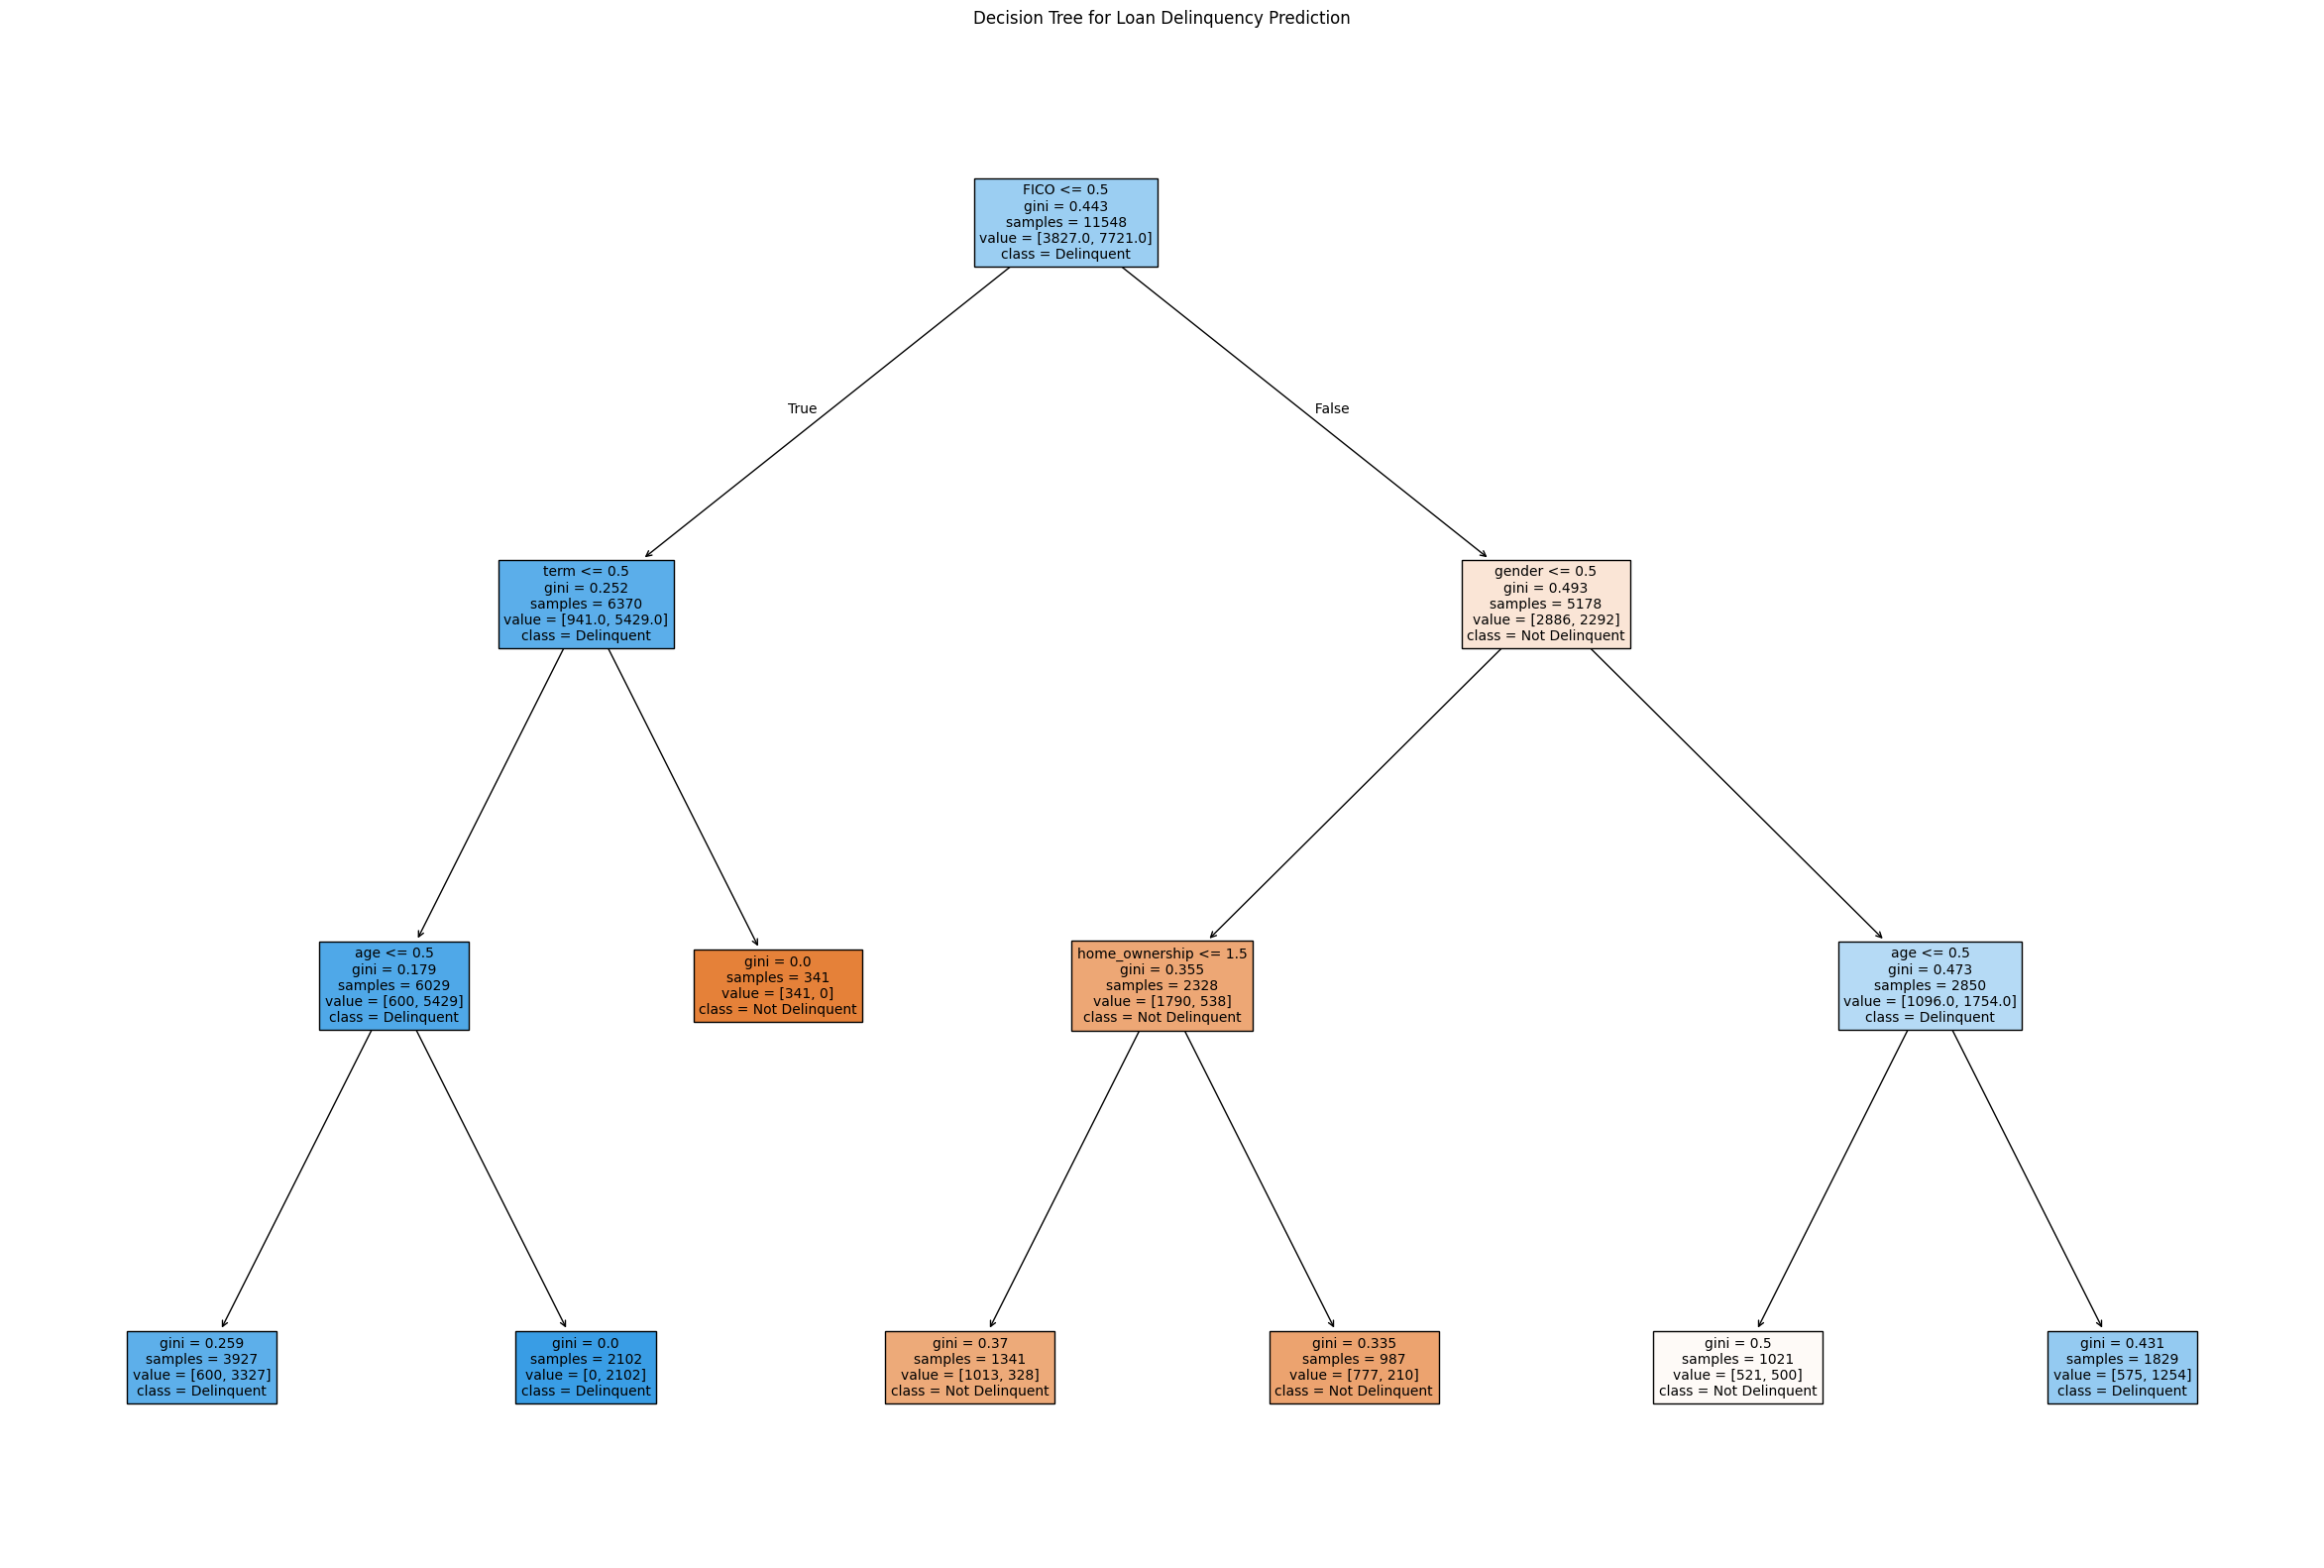

In [16]:
plt.figure(figsize=(30, 20))  # Increase size to fit more details
plot_tree(clf, feature_names=X.columns, 
          class_names=['Not Delinquent', 'Delinquent'], 
          filled=True, fontsize=10)
plt.title("Decision Tree for Loan Delinquency Prediction")
plt.show()


# Hyper parameter tuning in decision tree:

# Essential tuning Hyper-parameter in decision tree:
1. max-depth - number of levels the tree should contain
2. min_sample_split - The minimum number of samples required split
3. min_sample_leaf - The minimum number of samples required to be a leaf node
4. criterion - "gini" for classification and "squared_error" for regression
5. max_features- default consider all the features in the dataset

In [17]:
# Grid Search used to Optimize the hyper parameter tuning in CART
from sklearn.model_selection import GridSearchCV
import numpy as np

# Hyperparameter tuning using GridSearchCV - optimization technique
param_grid = {
    'max_depth': [3, 5, 10, None], # 4
    'min_samples_split': [2, 5, 10], # 3
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), 
           #cross validation(cv)               
                           param_grid, cv=5, # cv=10
                           scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)
# Best model from grid search
best_clf = grid_search.best_estimator_
print(best_clf)


DecisionTreeClassifier(max_depth=5, random_state=42)


In [18]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)
print(grid_search.best_score_)

DecisionTreeClassifier(max_depth=5, random_state=42)
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}
0.8507972225794008


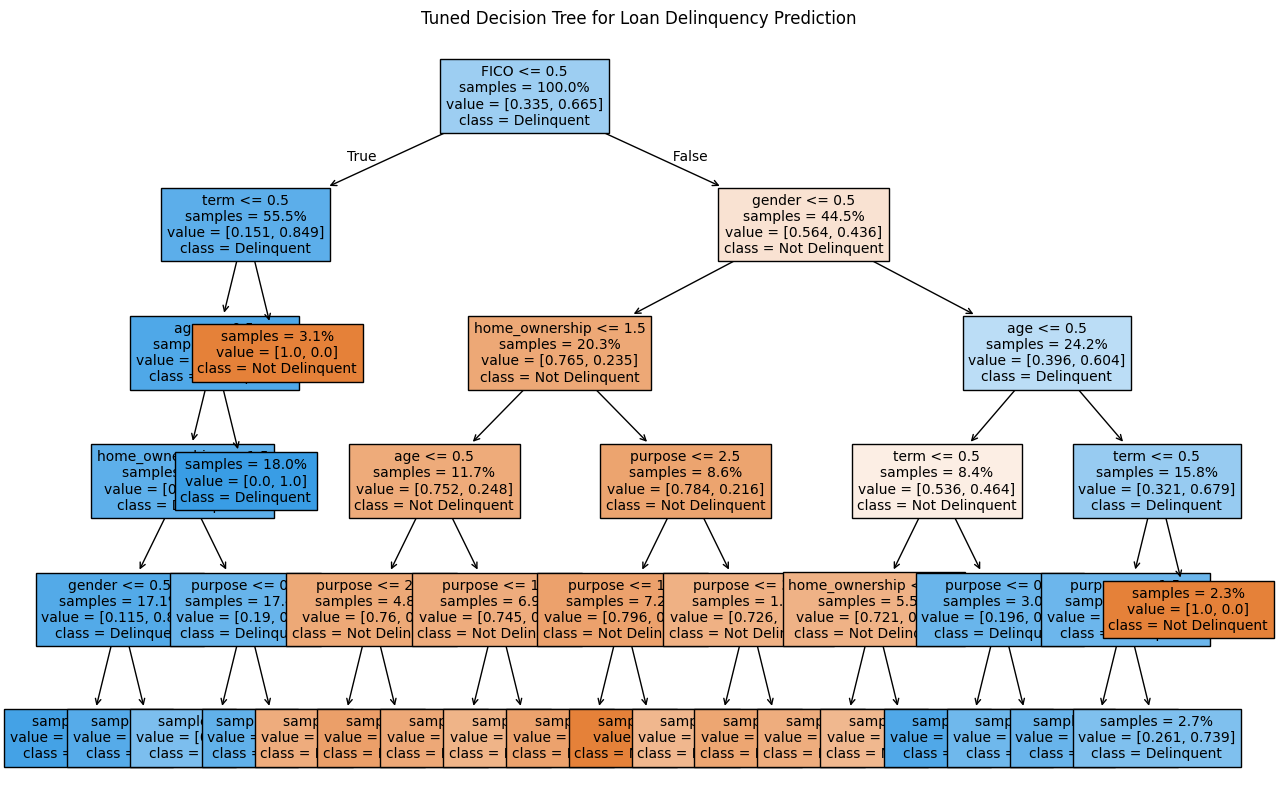

In [19]:

y_pred_best = best_clf.predict(X_test)

# Evaluate the tuned model
accuracy_best = accuracy_score(y_test, y_pred_best)
report_best = classification_report(y_test, y_pred_best)
# Plot the decision tree with tuned hyperparameters
plt.figure(figsize=(15, 10))
plot_tree(best_clf, feature_names=X.columns, 
          class_names=['Not Delinquent', 'Delinquent'], 
          filled=True, fontsize=10,proportion=True, impurity=False)

plt.title("Tuned Decision Tree for Loan Delinquency Prediction")
plt.show()

#grid_search.best_params_, accuracy_best, report_best


In [22]:
Build model by default decision tree
predict on train accuracy 1.0
and test 0.6
to check overfitting
build tree

optimize decision tree by using GridsearchCV method
hyper parameter tuning - max_depth, min-sample-splt, mini-sample-leaf,criterion, no.of vari
pick the best estimators through grid search cv
build tree with best estimators

predict - train, test
evaluate - confusion matrix, calssification report, auc-roc
train and test

try car_mpg for Decisiontree regressor()

finally - model performance and final recommendation

SyntaxError: invalid syntax (1281360874.py, line 1)